In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
fintech_df = pd.read_csv("./data/핀테크뉴스수집.csv")
fintech_df.head()

,날짜,일자제목,뉴스제목,본문
0,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,모집 2025 핀테크 전문가 과정 FinBoost Academy 모듈 4 5 6 참...
1,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...
2,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,모집 온라인 과정 핀테크를 통한 금융 AI 트렌드와 혁신 사례 12 31 상시모집 ...
3,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기...
4,2025-11-21,[11/21 핀테크 주요뉴스],"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",연합뉴스 금융감독원이 한국투자증권 미래에셋증권 키움증권의 종합투자계좌 IMA 발행어...


In [3]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12187 entries, 0 to 12186
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      12187 non-null  object
 1   일자제목    12187 non-null  object
 2   뉴스제목    12187 non-null  object
 3   본문      12187 non-null  object
dtypes: object(4)
memory usage: 381.0+ KB


In [4]:
fintech_df = fintech_df.drop("일자제목", axis=1)

In [5]:
import re

In [6]:
df = fintech_df[fintech_df["본문"].notna()]

In [7]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [8]:
fintech_df["clean"] = fintech_df["본문"].apply(text_clean)

In [9]:
def simple_tokenize(text):
    words = re.findall(r"[가-힣]{2,}",text)
    return words

In [10]:
df["tokens"] = fintech_df["clean"].apply(simple_tokenize)

In [11]:
df.head()

,날짜,뉴스제목,본문,tokens
0,2025-11-21,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,모집 2025 핀테크 전문가 과정 FinBoost Academy 모듈 4 5 6 참...,"[모집, 핀테크, 전문가, 과정, 모듈, 참여신청서, 접수, 작성일, 조회수, 홍보..."
1,2025-11-21,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,"[한국핀테크산업협회, 네트워킹, 행사, 핀테크, 커넥팅, 데이, 개최, 신청, 작성..."
2,2025-11-21,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,모집 온라인 과정 핀테크를 통한 금융 AI 트렌드와 혁신 사례 12 31 상시모집 ...,"[모집, 온라인, 과정, 핀테크를, 통한, 금융, 트렌드와, 혁신, 사례, 상시모집..."
3,2025-11-21,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기...,"[한국핀테크지원센터, 핀테크기업, 온라인, 채용관, 사람인, 참여, 기업, 모집, ..."
4,2025-11-21,"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",연합뉴스 금융감독원이 한국투자증권 미래에셋증권 키움증권의 종합투자계좌 IMA 발행어...,"[연합뉴스, 금융감독원이, 한국투자증권, 미래에셋증권, 키움증권의, 종합투자계좌, ..."


## WordCloud

In [64]:
from wordcloud import WordCloud

In [65]:
#형태소 분석기 Mecab !!!
from konlpy.tag import Mecab
mecab = Mecab()

In [66]:
stopwords = set([
    '기자','사진','제공','오늘','내일','이번','관련','대한','통해','위해','가장','이후','확인',
    '지난','현재','지난해','금융권','업계','전망','계획','발표','진행','이날','우려','중심','마련',
    '오전','오후','최근','것으로','밝혔다','전했다','오늘','기사','제공','시간','개월','전체',
    '은행','금융','핀테크','지원','서비스','고객','기업','센터','앱','플랫폼','대표','대통령',
    '카카오','카카오페이','카카오뱅크','네이버','토스','국민은행','신한은행','서울','적용',
    '하나은행','우리은행','금융감독원','금융위원회','금융위','금감원','안녕','아래','뉴스'
])

In [67]:
import re

In [68]:
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9 ]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [69]:
# 데이터프레임의 'tokens' 컬럼을 문자열 리스트로 변환
# df["tokens"]가 리스트 형태(['a', 'b'])라면 문자열 "['a', 'b']"로 바뀜
# clean_text 함수에 넣기 위해 문자열로 변환하는 과정
texts = df["tokens"].astype(str).tolist()

In [70]:
# 정제 및 명사 추출 수행
cleaned_docs = []
for t in texts:
    t = clean_text(t) #1차 정제: 특수문자 제거
    
    # Mecab을 활용해 명사만 추출
    nouns = mecab.nouns(t)
    
    # 불용어 처리 및 한 글자 단어 제거
    # len(word) > 1: 한 글자 단어는 의미가 모호한 경우가 많아 제외(예: '것', '수', '나')
    # word not in stopwords: 불용어 사전에 없는 단어만 남김
    nouns = [word for word in nouns if len(word) > 1 and word not in stopwords]
    cleaned_docs.append(nouns)

cleaned_docs[:3]

[['모집',
  '전문가',
  '과정',
  '모듈',
  '참여',
  '신청서',
  '접수',
  '작성',
  '회수',
  '홍보',
  '포스터',
  '한국',
  '산업',
  '성장',
  '기여',
  '최신',
  '트렌드',
  '반영',
  '교육',
  '과정',
  '기획',
  '운영',
  '전문가',
  '과정',
  '개발자',
  '교육',
  '일정',
  '관심',
  '참여',
  '신청',
  '방법',
  '일정',
  '안내',
  '모집',
  '일정',
  '과정',
  '모듈',
  '모듈',
  '모듈',
  '모집',
  '대상',
  '분야',
  '재직',
  '회사',
  '유관',
  '기관',
  '종사자',
  '예비',
  '창업자',
  '구직자',
  '관심',
  '누구',
  '모집',
  '인원',
  '과정',
  '내외',
  '과정',
  '안내',
  '교육',
  '일정',
  '모듈',
  '클라우드',
  '활용',
  '모듈',
  '프로토콜',
  '다중',
  '이전',
  '협업',
  '모듈',
  '외부',
  '도구',
  '연동',
  '중복',
  '신청',
  '가능',
  '교육',
  '장소',
  '비즈니스',
  '스쿨',
  '마포구',
  '우물',
  '고려',
  '빌딩',
  '교육비',
  '한국',
  '전액',
  '교육',
  '특전',
  '수강료',
  '전액',
  '모듈',
  '수료',
  '한국',
  '발급',
  '식사',
  '네트',
  '워킹',
  '전문가',
  '과정',
  '운영',
  '카카오톡',
  '문의',
  '참가',
  '신청서',
  '접수',
  '신청서',
  '접수',
  '링크',
  '이동',
  '클릭'],
 ['한국',
  '산업',
  '협회',
  '네트',
  '워킹',
  '행사',
  '데이',
  '개최',
  '신청',
  '작성',
  '데이',
  '추진',


In [71]:
# 1.단어 빈도수를 세기 위한 라이브러리 불러오기
from collections import Counter

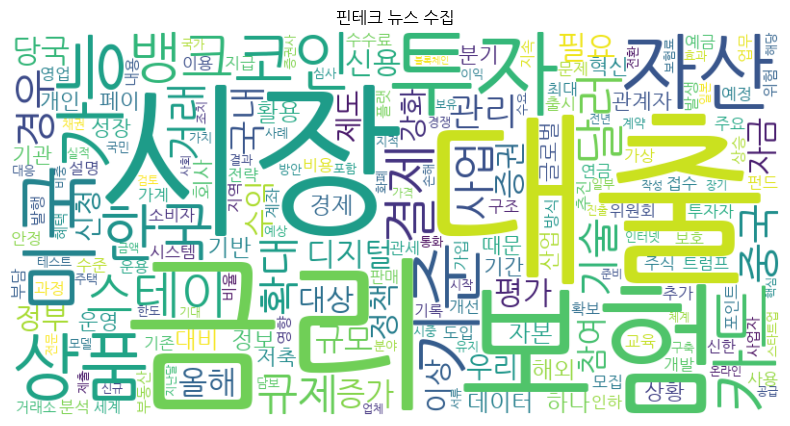

In [20]:
# 2.모든 문서의 단어를 하나의 리스트로 합치기 위한 빈 리스트 생성
all_words = []
# 3.앞서 정제된 문서 리스트(cleaned_docs)를 순회하며 모든 단어를 하나로 합침
# cleaned_docs는 [['단어', '단어'], ['단어', '단어']...] 형태의 2차원 리스트.
for doc in cleaned_docs:
    all_words.extend(doc) #extend를 사용하여 리스트 내부의 요소(단어)만 추가

# 4.각 단어가 몇 번 나왔는지 계산   
word_freq = Counter(all_words)

# 5.워드클라우드 객체 생성 및 설정
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 수집")
plt.show()

## LDA

In [21]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import LdaModel, CoherenceModel

In [22]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(texts):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in texts]

In [57]:
#Gensim LDA를 위한 사전(dictionary) & BOW 생성
dictionary = corpora.Dictionary(cleaned_docs)
# 너무 적게/많이 등장하는 단어 제거하여 품질 향상
# no_below=5 → 5개 미만 문서에 등장하면 제거
# no_above=0.5 → 전체 문서의 50% 넘게 등장하면 제거 (너무 흔한 단어 제거)
dictionary.filter_extremes(no_below=5, no_above=0.5)
# 문서별 BOW 생성
corpus = [dictionary.doc2bow(text) for text in cleaned_docs]

# 최적 k(토픽 수) 찾기 함수 (Coherence 기반)
def find_best_lda(corpus, dictionary, texts, start=2, end=8, step=1):
# """
# start~end 범위에서 LDA를 학습하며 coherence 점수 비교.
# 가장 높은 coherence를 가진 모델을 반환.
# """
    best_score = -1
    best_model = None
    best_k = start
    
    for k in range(start, end+1, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k,
                         random_state=42, passes=10, eval_every=None)
        
        cm = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        score = cm.get_coherence()
        print(f"k={k}, coherence={score:.4f}")
        
        if score > best_score:
            best_score, best_model, best_k = score, model, k
            
    print(f"Best k={best_k}, score={best_score:.4f}")
    return best_model, best_k, best_score

# 최적 LDA 모델 학습
best_model, best_k, best_score = find_best_lda(corpus, dictionary, cleaned_docs, start=2, end=8)
lda_model = best_model
#lda_model, best_k = find_best_lda(corpus, dictionary, cleaned_docs, start=2, end=8)

k=2, coherence=0.3081
k=3, coherence=0.4543
k=4, coherence=0.5080
k=5, coherence=0.5415
k=6, coherence=0.5745
k=7, coherence=0.5714
k=8, coherence=0.5896
Best k=8, score=0.5896


In [59]:
#토픽 출력
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topic {idx}")
    print(topic)

# 단어들의 확률 분포 

Topic 0
0.069*"보험" + 0.013*"상품" + 0.010*"판매" + 0.010*"보험료" + 0.010*"손해" + 0.009*"계약" + 0.008*"생명" + 0.008*"당국" + 0.007*"보장" + 0.007*"가입" + 0.007*"보험금" + 0.007*"소비자" + 0.006*"급여" + 0.006*"기준" + 0.005*"지급"
Topic 1
0.058*"대출" + 0.040*"금리" + 0.014*"기준" + 0.012*"가계" + 0.012*"신용" + 0.011*"저축" + 0.011*"뱅크" + 0.011*"증가" + 0.010*"분기" + 0.010*"인하" + 0.008*"당국" + 0.008*"대비" + 0.008*"관리" + 0.008*"올해" + 0.007*"부동산"
Topic 2
0.017*"기술" + 0.016*"코인" + 0.014*"디지털" + 0.014*"스테이" + 0.010*"시장" + 0.009*"자산" + 0.008*"기반" + 0.008*"혁신" + 0.008*"글로벌" + 0.007*"데이터" + 0.007*"블록체인" + 0.007*"화폐" + 0.006*"산업" + 0.006*"활용" + 0.006*"규제"
Topic 3
0.031*"연금" + 0.027*"상품" + 0.022*"투자" + 0.018*"수익" + 0.017*"계좌" + 0.017*"퇴직" + 0.015*"예금" + 0.012*"자산" + 0.011*"운용" + 0.010*"적금" + 0.009*"통장" + 0.009*"가입" + 0.009*"금리" + 0.009*"소득" + 0.008*"펀드"
Topic 4
0.017*"투자" + 0.016*"시장" + 0.013*"자산" + 0.013*"증권" + 0.011*"거래" + 0.009*"자본" + 0.008*"투자자" + 0.007*"제도" + 0.007*"자금" + 0.007*"당국" + 0.006*"가상" + 0.006*"강화" + 0.006*"위원회" + 0.006*"

In [60]:
from sklearn.manifold import TSNE

Topic 0: 보험, 상품, 판매, 보험료, 손해
Topic 1: 대출, 금리, 기준, 가계, 신용
Topic 2: 기술, 코인, 디지털, 스테이, 시장
Topic 3: 연금, 상품, 투자, 수익, 계좌
Topic 4: 투자, 시장, 자산, 증권, 거래
Topic 5: 카드, 결제, 페이, 뱅크, 데이터
Topic 6: 신청, 모집, 참여, 한국, 사업
Topic 7: 미국, 중국, 달러, 트럼프, 시장


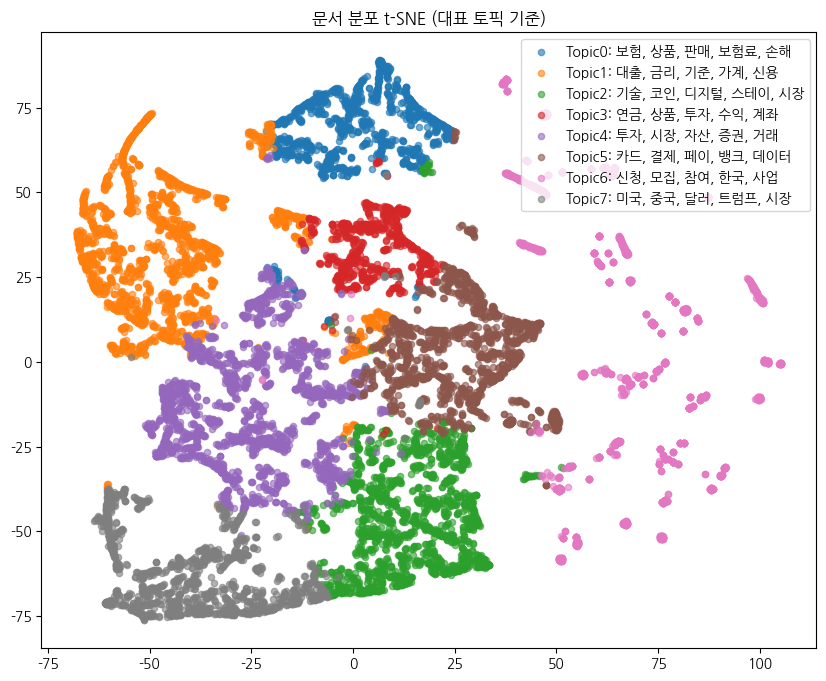

In [72]:
# 문서 -> 토픽 확률 분포 만들기
doc_topics = []
for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
    topic_vec = [prob for _, prob in sorted(topic_dist, key=lambda x:x[0])]
    doc_topics.append(topic_vec)
    
doc_topics = np.array(doc_topics)  # shape = (n_docs, n_topics)

# 토픽별 대표 단어로 '토픽 이름(라벨)' 자동 생성
topic_labels = {}

for idx, topic in lda_model.show_topics(num_topics=best_k, num_words=5, formatted=False):
    # 상위 단어 5개만 사용해서 라벨 생성
    words = [w for w, _ in topic]
    topic_labels[idx] = ", ".join(words)
    print(f"Topic {idx}: {topic_labels[idx]}")

# 문서의 토픽 분포를 t-SNE로 2D 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=40, max_iter=1000)
doc_tsne = tsne.fit_transform(doc_topics)

# 각 문서의 대표 토픽 찾기
dominant_topic = np.argmax(doc_topics, axis=1)

plt.figure(figsize=(10,8))
palette = plt.get_cmap('tab10')
for t in range(doc_topics.shape[1]):
    idxs = np.where(dominant_topic == t)[0]
    plt.scatter(doc_tsne[idxs,0], doc_tsne[idxs,1], c=[palette(t)], label=f"Topic{t}: {topic_labels[t]}", alpha=0.6, s=20)
plt.legend()
plt.title("문서 분포 t-SNE (대표 토픽 기준)")
plt.show()

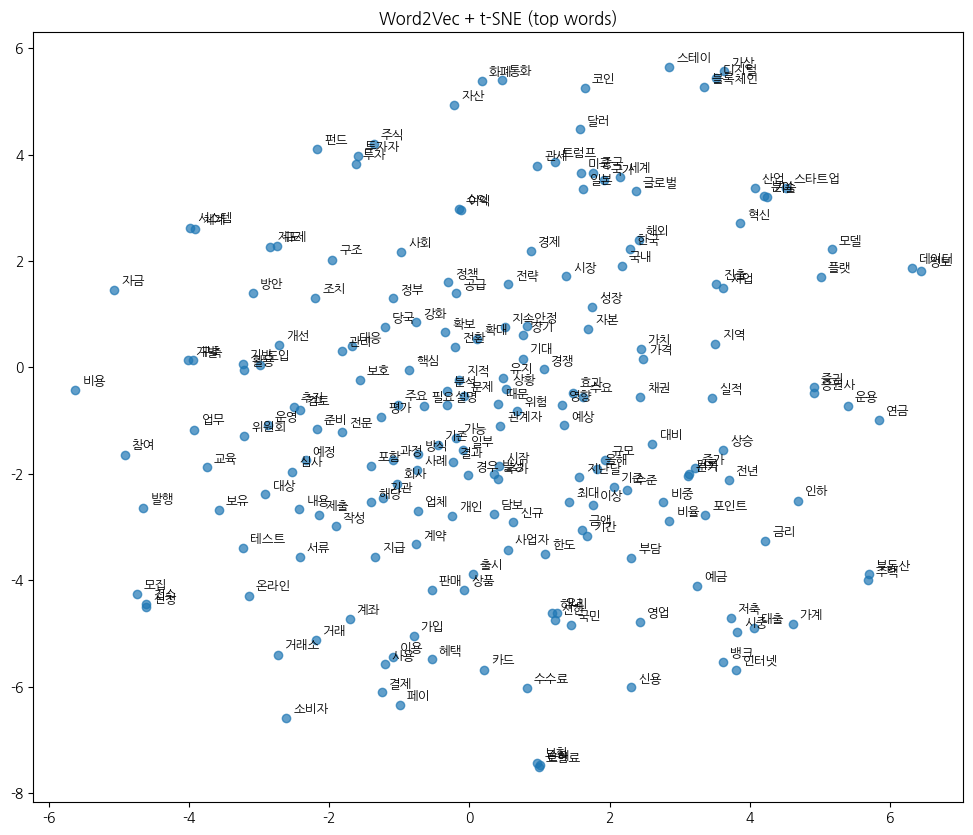

In [73]:
# Word2Vec 학습
from gensim.models import Word2Vec

# 학습 (작은 데이터면 size=100 정도)
w2v = Word2Vec(sentences=cleaned_docs, vector_size=100, window=5, min_count=5, workers=4, epochs=10)

# 자주 등장하는 단어 상위 200개 추출
all_words = [w for doc in cleaned_docs for w in doc]
topN = [w for w,_ in Counter(all_words).most_common(200) if w in w2v.wv]
embs = np.array([w2v.wv[w] for w in topN])

# Word2Vec → t-SNE 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
emb2 = tsne.fit_transform(embs)

plt.figure(figsize=(12,10))
plt.scatter(emb2[:,0], emb2[:,1], alpha=0.7)
for i, w in enumerate(topN):
    plt.text(emb2[i,0]+0.1, emb2[i,1]+0.1, w, fontsize=9)
plt.title("Word2Vec + t-SNE (top words)")
plt.show()

In [62]:
# TensorBoard Projector용 파일 저장 
save_dir = "./emb_projector"
import os
os.makedirs(save_dir, exist_ok=True)

# embeddings + metadata for topN
with open(os.path.join(save_dir, "embeddings.tsv"), "w", encoding="utf-8") as ef, \
     open(os.path.join(save_dir, "metadata.tsv"), "w", encoding="utf-8") as mf:
    for w in topN:
        vec = w2v.wv[w]
        ef.write("\t".join(map(str, vec)) + "\n")
        mf.write(w + "\n")

In [63]:
#tensorboard 매직 명령어
%load_ext tensorboard

#각 은행의 로그 디렉토리 지정해서 실행
%tensorboard --logdir ./logs/embedding_hana_neg

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
